In [106]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,File,Subjects,Keywords,Cited-by-count
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0
3,202202862.json,PHYS,NaN,0.0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0
...,...,...,...,...
20211,201802218.json,COMP,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,0.0
20212,201800225.json,MULT,NaN,27.0
20213,201802648.json,MEDI,Rehabilitation;Transcranial direct current sti...,7.0
20214,201800675.json,VETE,Canine cognitive dysfunction syndrome;Thailand...,1.0


In [107]:
df2 = df.dropna()
df2['Subjects']

0        AGRI;VETE;BIOC
1                  MEDI
2                  NEUR
4                  MEDI
5                  AGRI
              ...      
20208         PSYC;SOCI
20210              MEDI
20211              COMP
20213              MEDI
20214              VETE
Name: Subjects, Length: 16408, dtype: object

In [108]:


# Example data (replace with your actual DataFrame)
data = {
    "Subjects": df2['Subjects']}
df3 = pd.DataFrame(data)

# Step 1: Split the Subjects column into individual categories
df3['Subjects_split'] = df3['Subjects'].str.split(';')

# Step 2: Explode the lists into separate rows
exploded_df = df3.explode('Subjects_split')

# Step 3: Create dummy variables for the exploded column
dummy_df = pd.get_dummies(exploded_df['Subjects_split'])

# Step 4: Aggregate the dummy variables back to the original DataFrame
# Group by the original DataFrame's index
dummy_df = dummy_df.groupby(exploded_df.index).sum()

# Step 5: Combine the dummy-coded columns with the original DataFrame
df3 = pd.concat([df3, dummy_df], axis=1)

# Drop the intermediate column if you no longer need it
df3 = df3.drop(columns=['Subjects_split'])

df3

,Subjects,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,AGRI;VETE;BIOC,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,NEUR,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,AGRI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,PSYC;SOCI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
20210,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20211,COMP,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20213,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [109]:
df4 = pd.concat([df2,df3.drop(columns=['Subjects'])], axis=1)

In [110]:
df4.head()

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df5= pd.DataFrame(df4['Keywords'])

df5

,Keywords
0,Microencapsulation;Basil Oil;Performance;Broil...
1,care delivery;neurocritical care;resources;COV...
2,Partial Least Squares (PLS) analysis;neurocogn...
4,Cardiorespiratory function;Bra;Metabolism
5,tropical rainforest;Ichneumonoidea;insect-frui...
...,...
20208,National prevalence;Intimate partner violence;...
20210,therapeutic hypothermia;neurological prognosti...
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...
20213,Rehabilitation;Transcranial direct current sti...


In [112]:
from gensim.models import Word2Vec
import numpy as np


In [113]:

# Step 1: Split sentences into words using semicolon
df5['Tokenized'] = df5["Keywords"].apply(lambda x: x.split(';'))

df5



,Keywords,Tokenized
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]"
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f..."
...,...,...
20208,National prevalence;Intimate partner violence;...,"[National prevalence, Intimate partner violenc..."
20210,therapeutic hypothermia;neurological prognosti...,"[therapeutic hypothermia, neurological prognos..."
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,"[Landsat 8, NDVI, Sentinel-2, Remote sensing, ..."
20213,Rehabilitation;Transcranial direct current sti...,"[Rehabilitation, Transcranial direct current s..."


In [114]:

# Step 2: Train Word2Vec model
# Create a Word2Vec model using the tokenized column
w2v_model = Word2Vec(sentences=df5['Tokenized'], vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Convert words to vectors
def row_to_vector(row, model):
    vectors = []
    for word in row:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        # Average the vectors for the row
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words were in the vocabulary
        return np.zeros(model.vector_size)

df5['Vector'] = df5['Tokenized'].apply(lambda x: row_to_vector(x, w2v_model))

# Step 4: Save or use the vectors
print(df5[['Keywords', 'Vector']])


                                                Keywords  \
0      Microencapsulation;Basil Oil;Performance;Broil...   
1      care delivery;neurocritical care;resources;COV...   
2      Partial Least Squares (PLS) analysis;neurocogn...   
4              Cardiorespiratory function;Bra;Metabolism   
5      tropical rainforest;Ichneumonoidea;insect-frui...   
...                                                  ...   
20208  National prevalence;Intimate partner violence;...   
20210  therapeutic hypothermia;neurological prognosti...   
20211  Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...   
20213  Rehabilitation;Transcranial direct current sti...   
20214  Canine cognitive dysfunction syndrome;Thailand...   

                                                  Vector  
0      [-0.004536724, 0.0037470052, 0.0018258746, -0....  
1      [-0.0030871902, 0.0016365809, 0.00032464924, 0...  
2      [-0.003282851, -0.0006219441, 0.0059681227, -0...  
4      [0.0029912766, -0.0016811847, -0.001

In [115]:

df5.head()

,Keywords,Tokenized,Vector
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B...","[-0.004536724, 0.0037470052, 0.0018258746, -0...."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,...","[-0.0030871902, 0.0016365809, 0.00032464924, 0..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco...","[-0.003282851, -0.0006219441, 0.0059681227, -0..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]","[0.0029912766, -0.0016811847, -0.0012314256, 0..."
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f...","[-0.0009546199, 0.00078393926, -0.0061704977, ..."


In [116]:
df5["Vector"].iloc[0].mean()

0.00018951911

In [117]:
df5['Mean'] = df5['Vector'].apply(lambda x: x.mean())
df5['Vector'].head()

0    [-0.004536724, 0.0037470052, 0.0018258746, -0....
1    [-0.0030871902, 0.0016365809, 0.00032464924, 0...
2    [-0.003282851, -0.0006219441, 0.0059681227, -0...
4    [0.0029912766, -0.0016811847, -0.0012314256, 0...
5    [-0.0009546199, 0.00078393926, -0.0061704977, ...
Name: Vector, dtype: object

In [118]:
df6 = pd.concat([df4,df5['Mean']], axis=1)

In [119]:

df6.head()


,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000190
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000281
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.000243
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000275
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000148


In [120]:
df6.loc[df6['Subjects']=="COMP"].sort_values(by="Mean")

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
18425,201800631.json,COMP,Deep Learning;Text Categorization;Hierarchical...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000857
3869,202201056.json,COMP,Crowd Evacuation;Reinforcement Learning;Evacua...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000851
8590,201900067.json,COMP,Stochastic Petri Nets;Formal Model;Multi-Serve...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000780
8832,201900072.json,COMP,Formal model;Priority Queue;Generalized Stocha...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000774
14097,202003113.json,COMP,Deep Learning;Semantic Segmentation;Multi-task...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,202100990.json,COMP,Palpebral fissure region;Emotion;Decision tree...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000703
6890,202301949.json,COMP,data quality control;crowdsourcing;data labeling,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000788
11951,202103128.json,COMP,Formal verification;Timed automata;Simulation;...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000900
12647,202100788.json,COMP,Imbalanced problem;Undersampling;Mass ratio va...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000941


In [121]:
df6 = df5.drop(columns="Mean", inplace=True)

In [122]:
df4.head(1)

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
df6 = df5.drop(columns=['Tokenized', 'Keywords'])

In [124]:
df6

,Vector
0,"[-0.004536724, 0.0037470052, 0.0018258746, -0...."
1,"[-0.0030871902, 0.0016365809, 0.00032464924, 0..."
2,"[-0.003282851, -0.0006219441, 0.0059681227, -0..."
4,"[0.0029912766, -0.0016811847, -0.0012314256, 0..."
5,"[-0.0009546199, 0.00078393926, -0.0061704977, ..."
...,...
20208,"[-0.000855179, 0.001641344, -0.00015716627, 0...."
20210,"[0.005491245, -0.0019616599, 0.005498784, 0.00..."
20211,"[0.0011430625, -0.002611853, -0.000497992, 0.0..."
20213,"[-0.0047246353, 0.0050641187, -0.0030502921, -..."


In [125]:
df7 = pd.concat([df4,df6], axis=1)
X = df7.drop(columns=['File','Subjects','Keywords','Cited-by-count'])
X.head()

,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Vector
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[-0.004536724, 0.0037470052, 0.0018258746, -0...."
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[-0.0030871902, 0.0016365809, 0.00032464924, 0..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[-0.003282851, -0.0006219441, 0.0059681227, -0..."
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[0.0029912766, -0.0016811847, -0.0012314256, 0..."
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.0009546199, 0.00078393926, -0.0061704977, ..."


In [126]:
vector_expanded = pd.DataFrame(X['Vector'].tolist(), index=X.index)
vector_expanded.columns = [f'Vector_{i}' for i in range(vector_expanded.shape[1])]
df_expanded = pd.concat([X.drop(columns=['Vector']), vector_expanded], axis=1)
df_expanded


,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,Vector_90,Vector_91,Vector_92,Vector_93,Vector_94,Vector_95,Vector_96,Vector_97,Vector_98,Vector_99
0,1,0,1,0,0,0,0,0,0,0,...,0.001972,0.002279,0.002464,0.005052,-0.000988,-0.005509,-0.002635,0.001518,-0.003043,0.000922
1,0,0,0,0,0,0,0,0,0,0,...,-0.002044,-0.002256,0.003077,-0.004585,0.000474,0.001629,0.001272,-0.000793,-0.003307,0.006116
2,0,0,0,0,0,0,0,0,0,0,...,0.001784,-0.002038,0.003440,-0.000941,0.001864,0.000243,0.002703,0.002864,-0.002243,0.002364
4,0,0,0,0,0,0,0,0,0,0,...,0.003355,0.000594,0.000245,-0.004534,0.003016,-0.002717,-0.000770,-0.003278,-0.004514,0.000236
5,1,0,0,0,0,0,0,0,0,0,...,-0.001311,0.004370,-0.004940,-0.005194,0.004350,0.003013,0.003944,0.001330,0.001890,-0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,0,0,0,0,0,0,0,0,0,0,...,-0.001034,-0.000917,0.005367,-0.000446,0.003885,0.000406,-0.002389,-0.003883,-0.002214,0.003451
20210,0,0,0,0,0,0,0,0,0,0,...,0.000794,-0.006657,0.000047,0.002314,-0.006048,0.006261,-0.000517,-0.003914,-0.001865,-0.001612
20211,0,0,0,0,0,0,1,0,0,0,...,0.002425,-0.000742,-0.000065,0.001359,0.000103,0.001039,-0.000586,0.002775,-0.000864,-0.000913
20213,0,0,0,0,0,0,0,0,0,0,...,0.003681,-0.001618,-0.003105,0.000789,-0.000970,0.001092,0.002688,-0.000206,-0.001291,-0.000478


In [127]:
df_expanded.to_csv('out.csv')

In [128]:
df_expanded.columns

Index(['AGRI', 'ARTS', 'BIOC', 'BUSI', 'CENG', 'CHEM', 'COMP', 'DECI', 'DENT',
       'EART',
       ...
       'Vector_90', 'Vector_91', 'Vector_92', 'Vector_93', 'Vector_94',
       'Vector_95', 'Vector_96', 'Vector_97', 'Vector_98', 'Vector_99'],
      dtype='object', length=127)

In [129]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, algorithm='brute')
neigh.fit(df_expanded)

NearestNeighbors(algorithm='brute')

Distances to neighbors: [[1.68587394e-07 7.76185827e+00 1.11880611e+01 1.12736921e+01
  1.12999152e+01]]
Indices of neighbors: [[    0  3629  8931 14357  1151]]


/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_42491/2778207331.py:18: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_42491/2778207331.py:20: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)


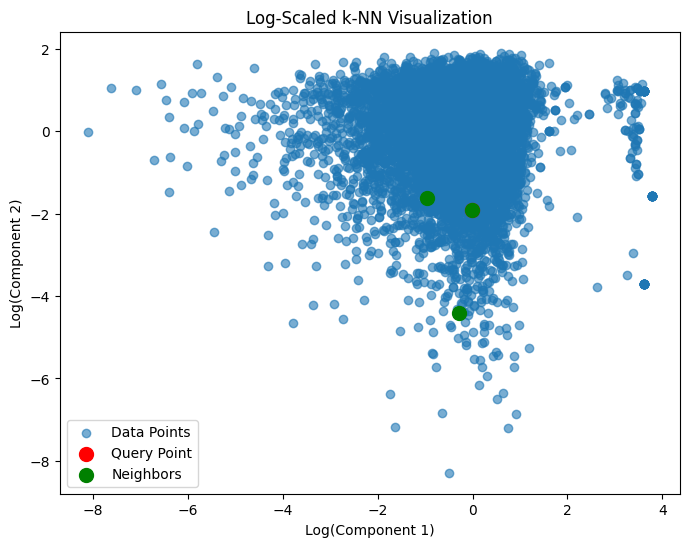

In [130]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded)
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)
plt.title('Log-Scaled k-NN Visualization')
plt.xlabel('Log(Component 1)')
plt.ylabel('Log(Component 2)')
plt.legend()
plt.show()

Distances to neighbors: [[0.         9.36086401 9.38127785 9.3991068  9.53061647]]
Indices of neighbors: [[   0 1067  467 1527  455]]


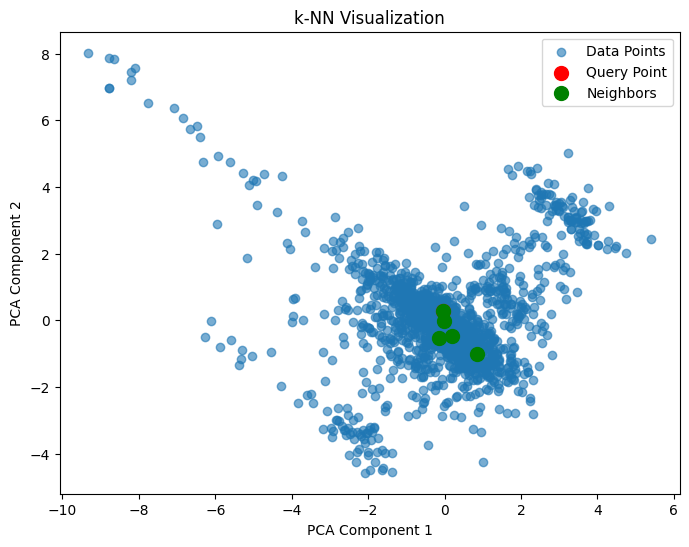

In [131]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded['COMP'] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], label="Data Points", alpha=0.6)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label='Neighbors', s=100)
plt.title('k-NN Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()